In [1]:
# playing with The UCI ML News Aggregator Dataset http://archive.ics.uci.edu/ml/datasets/News+Aggregator
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import scikitplot as skplt

In [2]:
#import data and add header row
news = pd.read_csv("NewsAggregatorDataset/newsCorpora.csv", sep="\t",
                  names=["ID", "TITLE", "URL", "PUBLISHER", "CATEGORY", "STORY", "HOSTNAME", "TIMESTAMP"])

In [3]:
#first six rows
news.head()

,ID,TITLE,URL,PUBLISHER,CATEGORY,STORY,HOSTNAME,TIMESTAMP
0,1,"Fed official says weak data caused by weather,...",http://www.latimes.com/business/money/la-fi-mo...,Los Angeles Times,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.latimes.com,1394470370698
1,2,Fed's Charles Plosser sees high bar for change...,http://www.livemint.com/Politics/H2EvwJSK2VE6O...,Livemint,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.livemint.com,1394470371207
2,3,US open: Stocks fall after Fed official hints ...,http://www.ifamagazine.com/news/us-open-stocks...,IFA Magazine,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.ifamagazine.com,1394470371550
3,4,"Fed risks falling 'behind the curve', Charles ...",http://www.ifamagazine.com/news/fed-risks-fall...,IFA Magazine,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.ifamagazine.com,1394470371793
4,5,Fed's Plosser: Nasty Weather Has Curbed Job Gr...,http://www.moneynews.com/Economy/federal-reser...,Moneynews,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.moneynews.com,1394470372027


In [4]:
#lowercase text and removing punctuation in title to have smaller size of model in future
import string

def normalize(s):
    s = s.lower()
    s = s.translate(str.maketrans('','', string.punctuation))
    return s

news['TITLE'] = [normalize(s) for s in news['TITLE']]
    

In [5]:
#first six rows
news.head()

,ID,TITLE,URL,PUBLISHER,CATEGORY,STORY,HOSTNAME,TIMESTAMP
0,1,fed official says weak data caused by weather ...,http://www.latimes.com/business/money/la-fi-mo...,Los Angeles Times,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.latimes.com,1394470370698
1,2,feds charles plosser sees high bar for change ...,http://www.livemint.com/Politics/H2EvwJSK2VE6O...,Livemint,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.livemint.com,1394470371207
2,3,us open stocks fall after fed official hints a...,http://www.ifamagazine.com/news/us-open-stocks...,IFA Magazine,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.ifamagazine.com,1394470371550
3,4,fed risks falling behind the curve charles plo...,http://www.ifamagazine.com/news/fed-risks-fall...,IFA Magazine,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.ifamagazine.com,1394470371793
4,5,feds plosser nasty weather has curbed job growth,http://www.moneynews.com/Economy/federal-reser...,Moneynews,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.moneynews.com,1394470372027


In [6]:
news['CATEGORY'].unique()

array(['b', 't', 'e', 'm'], dtype=object)

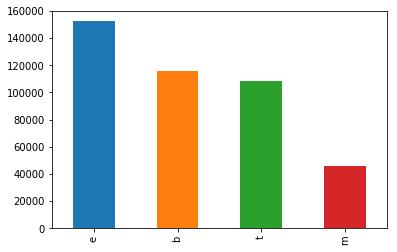

In [7]:
news['CATEGORY'].value_counts().plot(kind='bar')

In [8]:
#import vectorizers and transformer
#use CountVectorizer + TfidfTransformer | TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer

###### USE WITHOUT PIPELINE ########
#vectorize text in title
#vectorizer = CountVectorizer(stop_words = 'english')
#x_data = vectorizer.fit_transform(news['TITLE'])

In [9]:
# taken from Ritchie Ng post "Vectorization, Multinomial Naive Bayes Classifier and Evaluation"
# http://www.ritchieng.com/machine-learning-multinomial-naive-bayes-vectorization/

# Why are we splitting into training and testing sets before vectorizing?

# If we vectorize then we train/test split, our document-term matrix would contain every single feature (word) 
# in the test and training sets
# What we want is to simulate the real world
# We would always see words we have not seen before
# so this method is not realistic and we cannot properly evaluate our models
# Split then vectorize (correct way)

# We do the train/test split before the CountVectorizer to properly simulate the real world
# where our future data contains words we have not seen before
# After you train your data and chose the best model,
# you would then train on all of your data before predicting actual future data to maximize learning.

In [10]:
#split data into train and test subsets
from sklearn.model_selection import train_test_split

#X_train, X_test, y_train, y_test = train_test_split(x_data, news['CATEGORY'], random_state=42)
X_train, X_test, y_train, y_test = train_test_split(news['TITLE'], news['CATEGORY'], random_state=42)

print(X_train.shape)
print(X_test.shape)
#(observations - labels(unique word), occurences - number of unique words in all corpus of headlines)

(316814,)
(105605,)


In [11]:
#building a classifier
from sklearn.naive_bayes import MultinomialNB

###### USE WITHOUT PIPELINE ########
#clf_mnb = MultinomialNB(alpha=.01).fit(X_train, y_train)

In [12]:
###### USE WITHOUT PIPELINE ########
#testing on test data
#predicted = clf_mnb.predict(X_test)
#np.mean(predicted == y_test)

In [13]:
###### USE WITHOUT PIPELINE ########
#alternative to above & np
#clf_mnb.score(X_test, y_test)

In [14]:
#predicted

In [15]:
#to check all out metricts
from sklearn import metrics

#metrics.f1_score(y_test, predicted, average='macro')

In [16]:
from sklearn.metrics import classification_report
#print(classification_report(y_test, predicted))

In [17]:
#pipeline for Naive Bayse classifier

from sklearn.pipeline import Pipeline
clf_mnb = Pipeline([
        ('vect', CountVectorizer(stop_words='english')),
        #('tfidf', TfidfTransformer()),
        ('clf', MultinomialNB(alpha=.01)),
    ])


In [18]:
#.fit(train) - learns the vocabulary of the training data
clf_mnb = clf_mnb.fit(X_train, y_train)

In [19]:
# apply on text data

predicted = clf_mnb.predict(X_test)
np.mean(predicted == y_test)

0.9295109133090289

In [20]:
#tune params in GridSearchCV

from sklearn.model_selection import GridSearchCV

parameters = {'vect__ngram_range': [(1, 1), (1, 2)],
              #'tfidf__use_idf': (True, False),
              'clf__alpha': (1e-2, 1e-3),
}
gs_clf_mnb = GridSearchCV(clf_mnb, parameters, n_jobs=-1)
gs_clf_mnb = gs_clf_mnb.fit(X_train, y_train)

In [21]:
#check out best score with tuned params
gs_clf_mnb.best_score_

0.9490142481077225

In [22]:
#best params for clf
gs_clf_mnb.best_params_

{'clf__alpha': 0.01, 'vect__ngram_range': (1, 2)}

In [23]:
#apply GridSearch params on test data
predicted = gs_clf_mnb.predict(X_test)
np.mean(predicted == y_test)

0.9521897637422471

In [24]:
from sklearn.metrics import classification_report

#classification_report(y_true, y_pred, labels=None, target_names=None, sample_weight=None, digits=2)
#y_true = Ground truth (correct) target values.
#y_pred = Estimated targets as returned by a classifier.
print(classification_report(y_test, predicted))

             precision    recall  f1-score   support

          b       0.94      0.93      0.93     29117
          e       0.98      0.98      0.98     37988
          m       0.95      0.95      0.95     11319
          t       0.93      0.94      0.94     27181

avg / total       0.95      0.95      0.95    105605



In [25]:
#confusion matrix for gs_clf_mnb
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, predicted))

[[27155   345   298  1319]
 [  333 37157   129   369]
 [  279   207 10712   121]
 [ 1225   309   115 25532]]


In [26]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

print("Accuracy score: ", accuracy_score(y_test, predicted))
print("Recall score: ", recall_score(y_test, predicted, average = 'weighted'))
print("Precision score: ", precision_score(y_test, predicted, average = 'weighted'))
print("F1 score: ", f1_score(y_test, predicted, average = 'weighted'))

Accuracy score:  0.9521897637422471
Recall score:  0.9521897637422471
Precision score:  0.9521917994708027
F1 score:  0.9521866148926127


In [27]:
# calculate predicted probabilities for predicted (well calibrated)
# probabilities for positive label only [:, 1]
y_pred_prob_mnb = gs_clf_mnb.predict_proba(predicted)[:, 1]
y_pred_prob_mnb

array([0.36135082, 0.36135082, 0.36135082, ..., 0.36135082, 0.36135082,
       0.36135082])

In [28]:
#check false negatives
#false_n = X_test[predicted < y_test]
#false_n

In [29]:
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.calibration import CalibratedClassifierCV
# Pipeline for SVM Classifier
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline

#using calibrated classifier to predict probabilities for each label
clf_svm = Pipeline([
        ('vect', CountVectorizer(stop_words='english')),
        #('clf', SGDClassifier(loss='hinge', alpha=1e-3, max_iter=5, random_state=42)),
        ('clf', CalibratedClassifierCV(LinearSVC(loss='squared_hinge', max_iter=5, random_state=42))),
    ])

In [30]:
clf_svm = clf_svm.fit(X_train, y_train)
predicted = clf_svm.predict(X_test)
np.mean(predicted == y_test)

c:\users\kzaytseva\appdata\local\continuum\anaconda3_new\envs\textclass\lib\site-packages\sklearn\calibration.py:435: RuntimeWarning: overflow encountered in exp
  E = np.exp(AB[0] * F + AB[1])
c:\users\kzaytseva\appdata\local\continuum\anaconda3_new\envs\textclass\lib\site-packages\sklearn\calibration.py:445: RuntimeWarning: overflow encountered in exp
  E = np.exp(AB[0] * F + AB[1])
c:\users\kzaytseva\appdata\local\continuum\anaconda3_new\envs\textclass\lib\site-packages\sklearn\calibration.py:447: RuntimeWarning: invalid value encountered in multiply
  TEP_minus_T1P = P * (T * E - T1)
c:\users\kzaytseva\appdata\local\continuum\anaconda3_new\envs\textclass\lib\site-packages\sklearn\calibration.py:435: RuntimeWarning: overflow encountered in exp
  E = np.exp(AB[0] * F + AB[1])
c:\users\kzaytseva\appdata\local\continuum\anaconda3_new\envs\textclass\lib\site-packages\sklearn\calibration.py:445: RuntimeWarning: overflow encountered in exp
  E = np.exp(AB[0] * F + AB[1])
c:\users\kzaytsev

0.9437810709720184

In [31]:
# GridSearch for SVM

parameters = {'vect__ngram_range': [(1, 1), (1, 2)],
              #'clf__C': [1],
}
gs_clf_svm = GridSearchCV(clf_svm, parameters, n_jobs=-1)
gs_clf_svm = gs_clf_svm.fit(X_train, y_train)
gs_clf_svm.best_score_

c:\users\kzaytseva\appdata\local\continuum\anaconda3_new\envs\textclass\lib\site-packages\sklearn\calibration.py:435: RuntimeWarning: overflow encountered in exp
  E = np.exp(AB[0] * F + AB[1])
c:\users\kzaytseva\appdata\local\continuum\anaconda3_new\envs\textclass\lib\site-packages\sklearn\calibration.py:445: RuntimeWarning: overflow encountered in exp
  E = np.exp(AB[0] * F + AB[1])
c:\users\kzaytseva\appdata\local\continuum\anaconda3_new\envs\textclass\lib\site-packages\sklearn\calibration.py:447: RuntimeWarning: invalid value encountered in multiply
  TEP_minus_T1P = P * (T * E - T1)
c:\users\kzaytseva\appdata\local\continuum\anaconda3_new\envs\textclass\lib\site-packages\sklearn\calibration.py:435: RuntimeWarning: overflow encountered in exp
  E = np.exp(AB[0] * F + AB[1])
c:\users\kzaytseva\appdata\local\continuum\anaconda3_new\envs\textclass\lib\site-packages\sklearn\calibration.py:445: RuntimeWarning: overflow encountered in exp
  E = np.exp(AB[0] * F + AB[1])
c:\users\kzaytsev

0.9516940539243847

In [32]:
gs_clf_svm.best_params_

{'vect__ngram_range': (1, 2)}

In [33]:
# apply GridSearch params svm on test data
predicted = gs_clf_svm.predict(X_test)
np.mean(predicted == y_test)

c:\users\kzaytseva\appdata\local\continuum\anaconda3_new\envs\textclass\lib\site-packages\sklearn\calibration.py:510: RuntimeWarning: overflow encountered in exp
  return 1. / (1. + np.exp(self.a_ * T + self.b_))


0.9529094266369964

In [34]:
print(classification_report(y_test, predicted))

             precision    recall  f1-score   support

          b       0.94      0.93      0.93     29117
          e       0.98      0.98      0.98     37988
          m       0.96      0.94      0.95     11319
          t       0.93      0.95      0.94     27181

avg / total       0.95      0.95      0.95    105605



In [35]:
# confusion matrix for gs_clf_svm
print(confusion_matrix(y_test, predicted))

[[26940   350   233  1594]
 [  390 37283   100   215]
 [  347   193 10681    98]
 [ 1015   351    87 25728]]


In [36]:
print("Accuracy score: ", accuracy_score(y_test, predicted))
print("Recall score: ", recall_score(y_test, predicted, average = 'weighted'))
print("Precision score: ", precision_score(y_test, predicted, average = 'weighted'))
print("F1 score: ", f1_score(y_test, predicted, average = 'weighted'))

Accuracy score:  0.9529094266369964
Recall score:  0.9529094266369964
Precision score:  0.9529241561236163
F1 score:  0.9528745020939905


In [37]:
# calculate predicted probabilities for predicted (well calibrated)
# probabilities for positive label only [:, 1]
y_pred_prob_svm = gs_clf_svm.predict_proba(predicted)
y_pred_prob_svm

array([[0.39107961, 0.38569512, 0.0763487 , 0.14687657],
       [0.39107961, 0.38569512, 0.0763487 , 0.14687657],
       [0.39107961, 0.38569512, 0.0763487 , 0.14687657],
       ...,
       [0.39107961, 0.38569512, 0.0763487 , 0.14687657],
       [0.39107961, 0.38569512, 0.0763487 , 0.14687657],
       [0.39107961, 0.38569512, 0.0763487 , 0.14687657]])

In [38]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression
#from sklearn.multiclass import OneVsRestClassifier
#clf_logreg = LogisticRegression()

In [39]:
# Pipeline for Logistic Regression

clf_logreg = Pipeline([
        ('vect', CountVectorizer(stop_words='english')),
        ('clf', LogisticRegression(solver='newton-cg', multi_class='multinomial')),
    ])

In [40]:
clf_logreg = clf_logreg.fit(X_train, y_train)
predicted = clf_logreg.predict(X_test)
np.mean(predicted == y_test)

0.9466407840537854

In [41]:
# GridSearch for Logistic Regression

parameters = {'vect__ngram_range': [(1, 1), (1, 2)],
}
gs_clf_logreg = GridSearchCV(clf_logreg, parameters, n_jobs=-1)
gs_clf_logreg = gs_clf_logreg.fit(X_train, y_train)
gs_clf_logreg.best_score_

0.9495729355394648

In [42]:
gs_clf_logreg.best_params_

{'vect__ngram_range': (1, 2)}

In [43]:
# apply GridSearch params logreg on test data
predicted = gs_clf_logreg.predict(X_test)
np.mean(predicted == y_test)

0.9531461578523744

In [44]:
print(classification_report(y_test, predicted))

             precision    recall  f1-score   support

          b       0.93      0.94      0.94     29117
          e       0.97      0.98      0.98     37988
          m       0.97      0.93      0.95     11319
          t       0.94      0.94      0.94     27181

avg / total       0.95      0.95      0.95    105605



In [45]:
# confusion matrix for gs_clf_logreg
print(confusion_matrix(y_test, predicted))

[[27404   387   191  1135]
 [  379 37267    97   245]
 [  387   250 10546   136]
 [ 1273   386    82 25440]]


In [46]:
print("Accuracy score: ", accuracy_score(y_test, predicted))
print("Recall score: ", recall_score(y_test, predicted, average = 'weighted'))
print("Precision score: ", precision_score(y_test, predicted, average = 'weighted'))
print("F1 score: ", f1_score(y_test, predicted, average = 'weighted'))

Accuracy score:  0.9531461578523744
Recall score:  0.9531461578523744
Precision score:  0.9531871706999675
F1 score:  0.9531155680256468


In [47]:
import matplotlib.pyplot as plt
import scikitplot as skplt

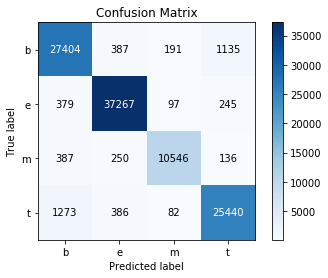

In [48]:
skplt.metrics.plot_confusion_matrix(y_test, predicted)

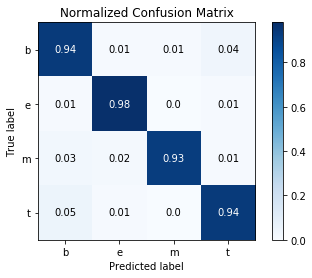

In [49]:
skplt.metrics.plot_confusion_matrix(y_test, predicted, normalize=True)

In [50]:
# calculate predicted probabilities for predicted (well calibrated)
# probabilities for positive label only [:, 1]
y_pred_prob_logreg = gs_clf_logreg.predict_proba(predicted)[:, 1]
y_pred_prob_logreg

array([0.36196559, 0.36196559, 0.36196559, ..., 0.36196559, 0.36196559,
       0.36196559])

In [51]:
# calculate accuracy
metrics.accuracy_score(y_test, predicted)

0.9531461578523744

classif_rate for MNB : 95.218976 


c:\users\kzaytseva\appdata\local\continuum\anaconda3_new\envs\textclass\lib\site-packages\ipykernel_launcher.py:37: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
c:\users\kzaytseva\appdata\local\continuum\anaconda3_new\envs\textclass\lib\site-packages\sklearn\calibration.py:435: RuntimeWarning: overflow encountered in exp
  E = np.exp(AB[0] * F + AB[1])
c:\users\kzaytseva\appdata\local\continuum\anaconda3_new\envs\textclass\lib\site-packages\sklearn\calibration.py:445: RuntimeWarning: overflow encountered in exp
  E = np.exp(AB[0] * F + AB[1])
c:\users\kzaytseva\appdata\local\continuum\anaconda3_new\envs\textclass\lib\site-packages\sklearn\calibration.py:447: RuntimeWarning: invalid value encountered in multiply
  TEP_minus_T1P = P * (T * E - T1)
c:\users\kzaytseva\appdata\local\continuum\anaconda3_new\envs\textclass\lib\site-packages\sklearn\calibration.py:435: RuntimeWarning: overflow encountered in exp
 

classif_rate for SVM : 95.290943 


c:\users\kzaytseva\appdata\local\continuum\anaconda3_new\envs\textclass\lib\site-packages\ipykernel_launcher.py:37: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


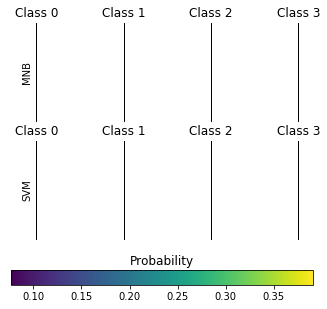

In [76]:
from sklearn import model_selection
import matplotlib.pyplot as plt

classifiers = {}
classifiers.update({'MNB': gs_clf_mnb})
classifiers.update({'SVM': gs_clf_svm})
#classifiers.update({'LR': gs_clf_logreg})

#n of classifiers
n_classifiers = len(classifiers)

plt.figure(figsize=(3 * 2, n_classifiers * 2))
plt.subplots_adjust(bottom=.2, top=.95)

xx = np.linspace(3, 9, 100)
yy = np.linspace(1, 5, 100).T
xx, yy = np.meshgrid(xx, yy)
Xfull = np.c_[xx.ravel(), yy.ravel()]

for index, (name, classifier) in enumerate(classifiers.items()):
    classifier.fit(X_train, y_train)

    y_pred = classifier.predict(X_test)
    classif_rate = np.mean(y_pred.ravel() == y_test.ravel()) * 100
    print("classif_rate for %s : %f " % (name, classif_rate))

    probas = classifier.predict_proba(y_pred)
    n_classes = np.unique(y_pred).size
    for k in range(n_classes):
        plt.subplot(n_classifiers, n_classes, index * n_classes + k + 1)
        plt.title("Class %d" % k)
        if k == 0:
            plt.ylabel(name)
        imshow_handle = plt.imshow(probas)
        plt.xticks(())
        plt.yticks(())
        idx = (y_pred == k)
        if idx:
            plt.scatter(X[idx, 0], X[idx, 1], marker='o', c='k')

ax = plt.axes([0.15, 0.04, 0.7, 0.05])
plt.title("Probability")
plt.colorbar(imshow_handle, cax=ax, orientation='horizontal')

plt.show()

In [77]:
from sklearn.model_selection import cross_val_predict
from sklearn import linear_model

c:\users\kzaytseva\appdata\local\continuum\anaconda3_new\envs\textclass\lib\site-packages\sklearn\calibration.py:435: RuntimeWarning: overflow encountered in exp
  E = np.exp(AB[0] * F + AB[1])
c:\users\kzaytseva\appdata\local\continuum\anaconda3_new\envs\textclass\lib\site-packages\sklearn\calibration.py:445: RuntimeWarning: overflow encountered in exp
  E = np.exp(AB[0] * F + AB[1])
c:\users\kzaytseva\appdata\local\continuum\anaconda3_new\envs\textclass\lib\site-packages\sklearn\calibration.py:447: RuntimeWarning: invalid value encountered in multiply
  TEP_minus_T1P = P * (T * E - T1)
c:\users\kzaytseva\appdata\local\continuum\anaconda3_new\envs\textclass\lib\site-packages\sklearn\calibration.py:435: RuntimeWarning: overflow encountered in exp
  E = np.exp(AB[0] * F + AB[1])
c:\users\kzaytseva\appdata\local\continuum\anaconda3_new\envs\textclass\lib\site-packages\sklearn\calibration.py:445: RuntimeWarning: overflow encountered in exp
  E = np.exp(AB[0] * F + AB[1])
c:\users\kzaytsev

c:\users\kzaytseva\appdata\local\continuum\anaconda3_new\envs\textclass\lib\site-packages\sklearn\calibration.py:435: RuntimeWarning: overflow encountered in exp
  E = np.exp(AB[0] * F + AB[1])
c:\users\kzaytseva\appdata\local\continuum\anaconda3_new\envs\textclass\lib\site-packages\sklearn\calibration.py:445: RuntimeWarning: overflow encountered in exp
  E = np.exp(AB[0] * F + AB[1])
c:\users\kzaytseva\appdata\local\continuum\anaconda3_new\envs\textclass\lib\site-packages\sklearn\calibration.py:447: RuntimeWarning: invalid value encountered in multiply
  TEP_minus_T1P = P * (T * E - T1)
c:\users\kzaytseva\appdata\local\continuum\anaconda3_new\envs\textclass\lib\site-packages\sklearn\calibration.py:435: RuntimeWarning: overflow encountered in exp
  E = np.exp(AB[0] * F + AB[1])
c:\users\kzaytseva\appdata\local\continuum\anaconda3_new\envs\textclass\lib\site-packages\sklearn\calibration.py:445: RuntimeWarning: overflow encountered in exp
  E = np.exp(AB[0] * F + AB[1])
c:\users\kzaytsev

NameError: name 'y' is not defined

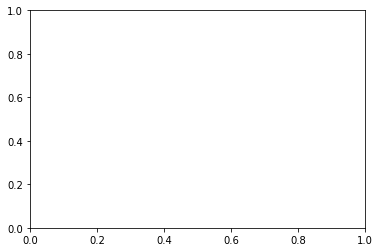

In [78]:

predicted_cv = cross_val_predict(gs_clf_svm, X_train, y_train, cv=10)

fig, ax = plt.subplots()
ax.scatter(y, predicted_cv, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()